# SALES PREDICTION

Importing the required libraries for the project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Reading the dataset from the .csv file

In [3]:
sales_data = pd.read_csv("Advertising.csv")

Getting the insights from the dataset

In [4]:
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
sales_data.shape

(200, 5)

Removing the useless columns from the dataset i.e. which is not required for the project

In [6]:
sales_data = sales_data.drop("Unnamed: 0",axis=1)

In [7]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Getting the information about the dataset

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Data preprossing

In [9]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
sales_data.duplicated().sum()

0

In [11]:
sales_data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


Getting the satistical analysis about the data

In [12]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Getting the insights about the data using the pairplot graph

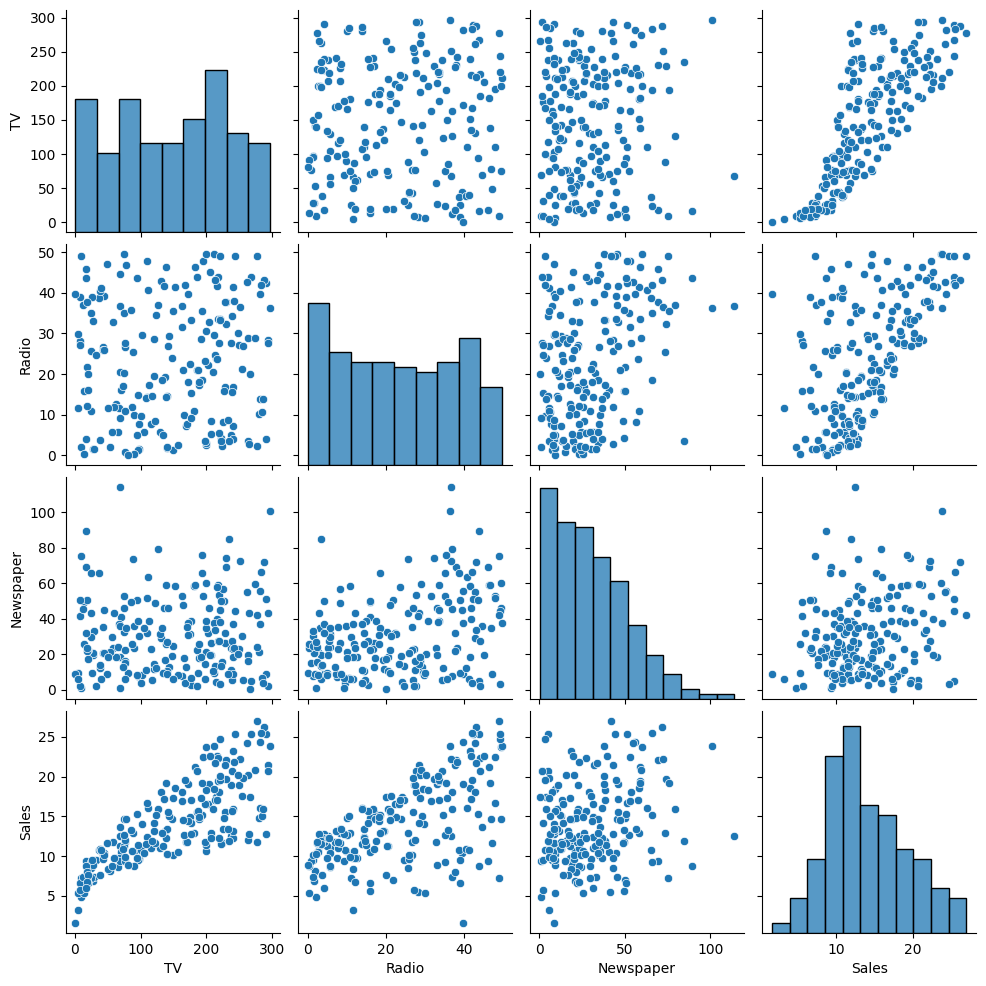

In [13]:
sns.pairplot(sales_data)
plt.show()

Plotting the Heatmap and identifying the relations about various columns of the dataset.

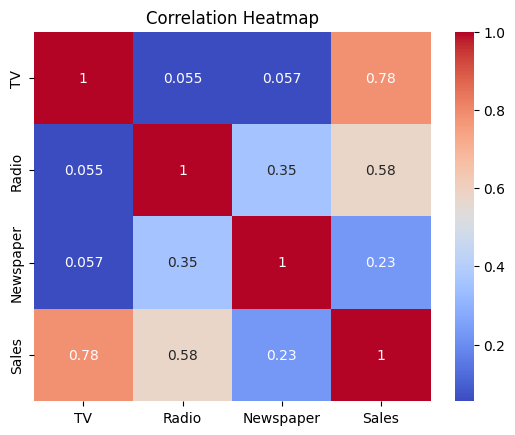

In [14]:
correlation_matrix = sales_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Seperating out the features and target from the dataset

In [15]:
X = sales_data.drop("Sales",axis=1)
Y = sales_data["Sales"]

In [16]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


Splitting the dataset for the trainning and testing data

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=7,test_size=0.2)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


Using the Random Forest Regressor algorithm for the predicton of the Sales.

In [19]:
model = RandomForestRegressor(n_estimators=99)

In [20]:
model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=99)

Predicting on the trainning data

In [21]:
train_prediction = model.predict(X_train)

In [22]:
mae = mean_absolute_error(Y_train, train_prediction)
mse = mean_squared_error(Y_train, train_prediction)
r2 = r2_score(Y_train, train_prediction)

In [23]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 0.21034722222222121
Mean Squared Error: 0.08916284690337671
R-squared (R2) Score: 0.996679650554238


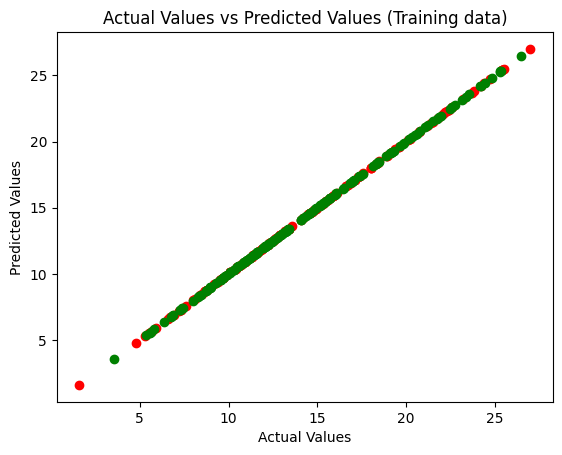

In [33]:
plt.scatter(Y_train, Y_train, color='red', label='Actual')
plt.scatter(train_prediction, train_prediction, color='green', label='Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Training data)")
plt.legend
plt.show()

Predicting on the Testing Data

In [25]:
test_prediction = model.predict(X_test)

In [26]:
mae_test = mean_absolute_error(Y_test, test_prediction)
mse_test = mean_squared_error(Y_test, test_prediction)
r2_test = r2_score(Y_test, test_prediction)

In [27]:
print("Mean Absolute Error:", mae_test)
print("Mean Squared Error:", mse_test)
print("R-squared (R2) Score:", r2_test)

Mean Absolute Error: 0.5702777777777767
Mean Squared Error: 0.5142925466789071
R-squared (R2) Score: 0.9808506362730283


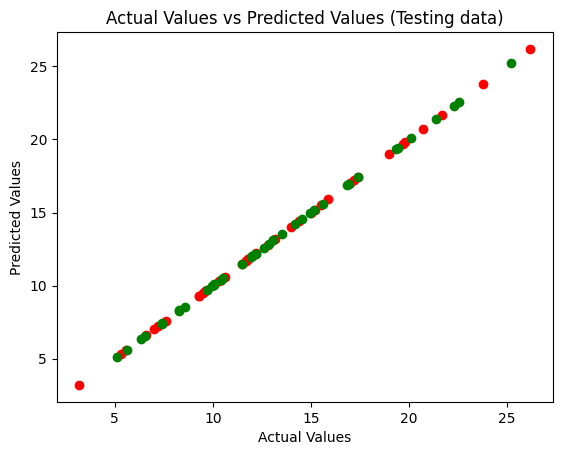

In [32]:
plt.scatter(Y_test, Y_test, color='red', label='Actual')
plt.scatter(test_prediction, test_prediction, color='green', label='Predicted')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Values vs Predicted Values (Testing data)")
plt.legend
plt.show()